In [0]:
import os
import pandas as pd
import numpy as np

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
#pick all files in mozam folder of drive
files=os.listdir('drive/My Drive/mozam')

In [0]:
#load all files from the folder
data=[pd.read_csv('drive/My Drive/mozam/'+i) for i in files]

In [0]:
#get High - Low for all files
for i,df in enumerate(data):
  df[files[i][:-4]]=df['High']-df['Close']

In [8]:
data[0]

,Date,Time,Open,High,Low,Close,Vol,OI,cl
0,06/05/2000,10:00,105.33,105.43,105.21,105.34,156,0,0.09
1,06/05/2000,11:00,105.35,105.35,104.94,105.10,538,0,0.25
2,06/05/2000,12:00,105.11,105.38,104.80,104.93,365,0,0.45
3,06/05/2000,13:00,104.94,105.05,104.83,105.04,159,0,0.01
4,06/05/2000,14:00,105.05,105.32,105.04,105.27,134,0,0.05
...,...,...,...,...,...,...,...,...,...
104586,06/03/2020,09:00,36.15,36.80,36.12,36.67,10532,8756,0.13
104587,06/03/2020,10:00,36.68,36.97,36.37,36.78,18809,16823,0.19
104588,06/03/2020,11:00,36.79,37.09,36.13,36.81,24315,23785,0.28
104589,06/03/2020,12:00,36.80,37.28,36.26,36.53,22242,23389,0.75


In [0]:
#set index to be data and time for all
data=[i.set_index(['Date','Time']).iloc[:,-1:] for i in data]

In [0]:
#concatenate all files to make one dataframe
df=pd.concat(data,axis=1,join='outer')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 158892 entries, ('01/01/2002', '20:00') to ('12/31/2019', '17:00')
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cl      104591 non-null  float64
 1   gc      96847 non-null   float64
 2   s       71808 non-null   float64
 3   rb      92679 non-null   float64
 4   nq      504 non-null     float64
 5   edm     93327 non-null   float64
 6   tu      99250 non-null   float64
 7   ty      107494 non-null  float64
 8   hg      95121 non-null   float64
 9   ng      98003 non-null   float64
 10  si      100219 non-null  float64
 11  jy      111628 non-null  float64
 12  ec      111524 non-null  float64
 13  sb      37801 non-null   float64
 14  rty     97445 non-null   float64
 15  y       115355 non-null  float64
dtypes: float64(16)
memory usage: 19.9+ MB


In [0]:
#skipping nq, s and sb  along with dropping nan columns
df=df.drop(columns=['nq','s','sb']).dropna()

In [14]:
df

cl   gc      rb    edm  ...       jy       ec  rty     y
Date       Time                             ...                             
01/01/2015 20:00  0.51  0.8  0.0040  0.005  ...  0.00160  0.00050  0.2  1.00
           22:00  0.23  0.4  0.0018  0.000  ...  0.00030  0.00050  0.2  0.50
01/01/2018 19:00  0.05  1.0  0.0066  0.000  ...  0.00020  0.00015  0.6  1.00
           20:00  0.02  1.0  0.0000  0.000  ...  0.00045  0.00070  0.5  1.25
           21:00  0.09  0.9  0.0022  0.000  ...  0.00010  0.00070  3.7  2.75
...                ...  ...     ...    ...  ...      ...      ...  ...   ...
12/31/2019 12:00  0.06  1.0  0.0014  0.000  ...  0.00010  0.00005  1.9  1.00
           13:00  0.36  0.2  0.0127  0.000  ...  0.00040  0.00060  0.1  0.25
           14:00  0.21  2.6  0.0076  0.005  ...  0.00030  0.00070  1.9  1.75
           15:00  0.38  1.2  0.0114  0.005  ...  0.00025  0.00005  5.7  2.75
           16:00  0.01  2.4  0.0006  0.005  ...  0.00045  0.00070  0.8  0.25

[72969 rows x 13 columns]

In [0]:
#choose only y
df=df.iloc[:,-1:]

In [69]:
df

,Date,Time,Open,High,Low,Close,Vol,OI
0,06/05/2000,01:00,1498.50,1499.00,1498.50,1498.75,6,0
1,06/05/2000,02:00,1499.25,1499.25,1497.75,1497.75,17,0
2,06/05/2000,03:00,1497.50,1497.50,1494.50,1496.00,50,0
3,06/05/2000,04:00,1496.25,1498.00,1495.75,1496.50,35,0
4,06/05/2000,05:00,1496.25,1496.75,1495.00,1495.50,52,0
...,...,...,...,...,...,...,...,...
115350,06/03/2020,10:00,3102.50,3110.50,3101.25,3107.00,106112,98948
115351,06/03/2020,11:00,3106.75,3117.50,3106.50,3114.25,99697,90683
115352,06/03/2020,12:00,3114.00,3114.50,3109.00,3109.25,50460,55479
115353,06/03/2020,13:00,3109.00,3113.50,3108.25,3110.50,38264,37907


In [20]:
df['lag_1']=df['y'].shift(1)
df['lag_2']=df['y'].shift(2)
df['lag_3']=df['y'].shift(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [0]:
df=df.dropna()

In [23]:
df

y  lag_1  lag_2  lag_3
Date       Time                            
01/01/2018 20:00  1.25   1.00   0.50   1.00
           21:00  2.75   1.25   1.00   0.50
           22:00  0.50   2.75   1.25   1.00
           23:00  0.00   0.50   2.75   1.25
01/01/2019 19:00  3.75   0.00   0.50   2.75
...                ...    ...    ...    ...
12/31/2019 12:00  1.00   2.50   9.25   2.75
           13:00  0.25   1.00   2.50   9.25
           14:00  1.75   0.25   1.00   2.50
           15:00  2.75   1.75   0.25   1.00
           16:00  0.25   2.75   1.75   0.25

[72966 rows x 4 columns]

In [0]:
X=df.iloc[:,1:].values

In [0]:
y=df.y.values

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

In [0]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso

In [0]:
XGB=XGBRegressor()
RFR=RandomForestRegressor()
SVR=SVR()
Lasso=Lasso()

In [0]:
from sklearn.model_selection import KFold, train_test_split
import numpy as np

In [0]:
X_trains=[]
y_trains=[]
X_tests=[]
y_tests=[]
kf = KFold(n_splits=10)
kf.get_n_splits(X)
for train_index, test_index in kf.split(X):
    X_trains.append(X[train_index])
    X_tests.append(X[test_index])
    y_trains.append(y[train_index])
    y_tests.append(y[test_index])

In [0]:
from sklearn.metrics import mean_absolute_error

In [44]:
XGB_error=[]
for i in range(10):
  print('Processing Batch : ',i+1)
  XGB.fit(X_trains[i],y_trains[i])
  XGB_error.append(mean_absolute_error(y_tests[i],XGB.predict(X_tests[i])))


Processing Batch :  1
[11:50:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Processing Batch :  2
[11:50:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Processing Batch :  3
[11:50:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Processing Batch :  4
[11:50:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Processing Batch :  5
[11:50:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Processing Batch :  6
[11:50:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Processing Batch :  7
[11:50:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is no

In [46]:
RFR_error=[]
for i in range(10):
  print('Processing Batch : ',i+1)
  RFR.fit(X_trains[i],y_trains[i])
  RFR_error.append(mean_absolute_error(y_tests[i],RFR.predict(X_tests[i])))


Processing Batch :  1
Processing Batch :  2
Processing Batch :  3
Processing Batch :  4
Processing Batch :  5
Processing Batch :  6
Processing Batch :  7
Processing Batch :  8
Processing Batch :  9
Processing Batch :  10


In [47]:
SVR_error=[]
for i in range(10):
  print('Processing Batch : ',i+1)
  SVR.fit(X_trains[i],y_trains[i])
  SVR_error.append(mean_absolute_error(y_tests[i],SVR.predict(X_tests[i])))


Processing Batch :  1


KeyboardInterrupt: ignored

In [48]:
Lasso_error=[]
for i in range(10):
  print('Processing Batch : ',i+1)
  Lasso.fit(X_trains[i],y_trains[i])
  Lasso_error.append(mean_absolute_error(y_tests[i],Lasso.predict(X_tests[i])))


Processing Batch :  1
Processing Batch :  2
Processing Batch :  3
Processing Batch :  4
Processing Batch :  5
Processing Batch :  6
Processing Batch :  7
Processing Batch :  8
Processing Batch :  9
Processing Batch :  10


In [51]:
Lasso_error

[0.5423695270927393,
 0.6354026375215793,
 0.6687205312322381,
 0.5223900929858543,
 0.46510744276060745,
 0.4574946200678025,
 0.5193846506356072,
 0.5494217970528734,
 0.5389808074133506,
 0.5194362651290672]

In [52]:
RFR_error

[0.5292958064368225,
 0.5849248676230868,
 0.6308055182934061,
 0.5086406650399192,
 0.45731752656292535,
 0.43108583629346914,
 0.49897409042277613,
 0.5319763045291654,
 0.5342885980259594,
 0.48508229305220474]

In [0]:
###########################################################
#### Indicators
import pandas_ta as ta

In [0]:
df=pd.read_csv('drive/My Drive/mozam/y.txt')
df=pd.concat([df,ta.volatility.bbands(df.Close)],join='outer',axis=1).dropna()

In [73]:
df

,Date,Time,Open,High,Low,Close,Vol,OI,BBL_5,BBM_5,BBU_5
4,06/05/2000,05:00,1496.25,1496.75,1495.00,1495.50,52,0,1494.240113,1496.90,1499.559887
5,06/05/2000,06:00,1495.25,1495.50,1493.75,1494.75,65,0,1493.847224,1496.10,1498.352776
6,06/05/2000,07:00,1495.00,1496.75,1495.00,1496.50,57,0,1494.366760,1495.85,1497.333240
7,06/05/2000,08:00,1496.50,1497.25,1492.25,1493.25,310,0,1492.575115,1495.30,1498.024885
8,06/05/2000,09:00,1493.50,1498.50,1492.75,1497.50,2775,0,1492.240399,1495.50,1498.759601
...,...,...,...,...,...,...,...,...,...,...,...
115350,06/03/2020,10:00,3102.50,3110.50,3101.25,3107.00,106112,98948,3081.464523,3096.95,3112.435477
115351,06/03/2020,11:00,3106.75,3117.50,3106.50,3114.25,99697,90683,3084.278644,3102.20,3120.121356
115352,06/03/2020,12:00,3114.00,3114.50,3109.00,3109.25,50460,55479,3091.844066,3105.75,3119.655934
115353,06/03/2020,13:00,3109.00,3113.50,3108.25,3110.50,38264,37907,3099.771656,3108.65,3117.528344


In [0]:
df['rsi']=ta.momentum.rsi(df.Close,2)

In [0]:
df=df.dropna()

In [0]:
df=pd.concat([df,ta.momentum.stoch(df.High,df.Low,df.Close)],join='outer',axis=1).dropna()

In [0]:
df['super_trend']=ta.overlap.supertrend(df.High, df.Low, df.Close,21)['SUPERT_21_3.0']

In [84]:
df['vwap']=ta.overlap.vwap(df.High,df.Low,df.Close,df.Vol)

[!] VWAP volume series is not datetime ordered. Results may not be as expected.


In [0]:
df=df.dropna()

In [0]:
df=df.set_index(['Date','Time'])

In [0]:
df['y']=(df['High']-df['Low']).shift(1)

In [0]:
df=df.dropna()

In [0]:
df['Close']=df.Close.shift(1)
df=df.dropna()
X=df.drop(columns=['Close'])
y=df.Close

In [0]:
df.to_csv('indicated.csv')

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.values)
y = sc_y.fit_transform(y.values.reshape(-1,1))

In [0]:
X_trains=[]
y_trains=[]
X_tests=[]
y_tests=[]
kf = KFold(n_splits=10)
kf.get_n_splits(X)
for train_index, test_index in kf.split(X):
    X_trains.append(X[train_index])
    X_tests.append(X[test_index])
    y_trains.append(y[train_index])
    y_tests.append(y[test_index])

In [151]:
XGB_error=[]
for i in range(10):
  print('Processing Batch : ',i+1)
  XGB.fit(X_trains[i],y_trains[i])
  XGB_error.append(mean_absolute_error(y_tests[i],XGB.predict(X_tests[i])))

Processing Batch :  1
[12:57:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Processing Batch :  2
[12:58:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Processing Batch :  3
[12:58:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Processing Batch :  4
[12:58:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Processing Batch :  5
[12:58:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Processing Batch :  6
[12:58:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Processing Batch :  7
[12:58:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is no

In [152]:
XGB_error

[0.00538819330390826,
 0.005494958084942229,
 0.005216749417844086,
 0.005937511981884125,
 0.02979015413103426,
 0.004527586733735944,
 0.0291339178458578,
 0.01803514819163008,
 0.0204530237241619,
 0.10926936737525662]

In [153]:
Lasso_error=[]
for i in range(10):
  print('Processing Batch : ',i+1)
  Lasso.fit(X_trains[i],y_trains[i])
  Lasso_error.append(mean_absolute_error(y_tests[i],Lasso.predict(X_tests[i])))

Processing Batch :  1
Processing Batch :  2
Processing Batch :  3
Processing Batch :  4
Processing Batch :  5
Processing Batch :  6
Processing Batch :  7
Processing Batch :  8
Processing Batch :  9
Processing Batch :  10


In [154]:
Lasso_error

[0.6383493791050251,
 0.9534462771347665,
 0.5931368363602165,
 0.42064156446208667,
 1.1735768853937898,
 0.6312834011624642,
 0.22850624891028395,
 0.7234789613106883,
 1.5262360462154172,
 2.239952918221777]

In [0]:
RFR_error=[]
for i in range(10):
  print('Processing Batch : ',i+1)
  RFR.fit(X_trains[i],y_trains[i])
  RFR_error.append(mean_absolute_error(y_tests[i],RFR.predict(X_tests[i])))

Processing Batch :  1


In [0]:
df['Close']=df.Close.shift(-1)

In [0]:
df=df.dropna()

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

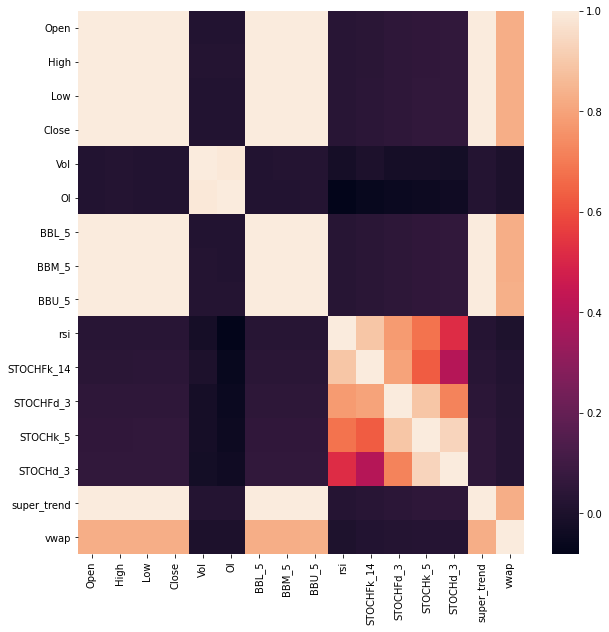

In [141]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

In [145]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Vol', 'OI', 'BBL_5', 'BBM_5', 'BBU_5',
       'rsi', 'STOCHFk_14', 'STOCHFd_3', 'STOCHk_5', 'STOCHd_3', 'super_trend',
       'vwap'],
      dtype='object')

In [0]:
df=df.drop(columns=['Vol','OI','rsi','STOCHFk_14', 'STOCHFd_3', 'STOCHk_5', 'STOCHd_3'])